In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
Current                                                67.815330
Fully Paid                                             23.408600
Charged Off                                             5.099061
Late (31-120 days)                                      1.306206
Issued                                                  0.953369
In Grace Period                                         0.704659
Late (16-30 days)                                       0.265614
Does not meet the credit policy. Status:Fully Paid      0.224031
Default                                                 0.137371
Does not meet the credit policy. Status:Charged Off     0.085758
Name: proportion, dtype: float64

In [6]:
df['loan_status']=df['loan_status'].apply(lambda x: x in ['Fully Paid','Charged Off'])

In [7]:
df['loan_status'].value_counts()

loan_status
False    634408
True     252971
Name: count, dtype: int64

In [8]:
df['loan_status']=df['loan_status'].apply(lambda x: 1 if x==True else 0)

In [9]:
null_col = df.columns[df.isnull().any()]
df[null_col].isnull().sum()

emp_title                       51462
emp_length                      44825
annual_inc                          4
desc                           761353
title                             153
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
open_acc                           29
pub_rec                            29
revol_util                        502
total_acc                          29
last_pymnt_d                    17659
next_pymnt_d                   252971
last_credit_pull_d                 53
collections_12_mths_ex_med        145
mths_since_last_major_derog    665676
annual_inc_joint               886868
dti_joint                      886870
verification_status_joint      886868
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    866007
open_il_6m  

In [10]:
df[null_col].isnull().sum()/len(df)*100

emp_title                       5.799326
emp_length                      5.051393
annual_inc                      0.000451
desc                           85.797951
title                           0.017242
delinq_2yrs                     0.003268
earliest_cr_line                0.003268
inq_last_6mths                  0.003268
mths_since_last_delinq         51.197065
mths_since_last_record         84.555303
open_acc                        0.003268
pub_rec                         0.003268
revol_util                      0.056571
total_acc                       0.003268
last_pymnt_d                    1.990018
next_pymnt_d                   28.507661
last_credit_pull_d              0.005973
collections_12_mths_ex_med      0.016340
mths_since_last_major_derog    75.015974
annual_inc_joint               99.942415
dti_joint                      99.942640
verification_status_joint      99.942415
acc_now_delinq                  0.003268
tot_coll_amt                    7.919502
tot_cur_bal     

In [11]:
null_percentages = df[null_col].isnull().sum() / len(df) * 100
columns_to_drop = null_percentages[null_percentages > 30].index
df = df.drop(columns_to_drop, axis=1)

In [12]:
df.shape

(887379, 53)

In [13]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [14]:
num_col = df.select_dtypes(include=['float64','int64']).columns
num_col

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [15]:
keep_col = ['addr_state', 'annual_inc', 'application_type','delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [16]:
len(keep_col)

32

In [17]:
drop_col = [col for col in df.columns if col not in keep_col]

In [18]:
df.drop(drop_col, axis=1, inplace=True)

In [19]:
uw_col = [ col for col in keep_col if col not in df.columns ]

In [20]:
uw_col

['fico_range_high', 'fico_range_low', 'mort_acc', 'pub_rec_bankruptcies']

In [21]:
df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type'],
      dtype='object')

In [22]:
print(df['id'].count())
print(df['id'].nunique())

887379
887379


In [23]:
df.drop('id', axis=1, inplace=True)

In [24]:
df.drop('zip_code', axis=1, inplace=True)

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(834919, 26)

In [27]:
pd.crosstab(df['home_ownership'],df['loan_status'],values=df['loan_amnt'],aggfunc=['mean','max','min'])

mean                    max               min        
loan_status                0             1        0        1        0       1
home_ownership                                                               
ANY             29150.000000   5000.000000  34300.0   5000.0  24000.0  5000.0
MORTGAGE        17013.954376  15189.921583  35000.0  35000.0    925.0   500.0
NONE            28333.333333  13624.375000  35000.0  30000.0  15000.0  3825.0
OTHER            8173.717949  11475.939850  24950.0  35000.0    500.0  1000.0
OWN             15046.210743  13200.030384  35000.0  35000.0    700.0   900.0
RENT            13465.318536  11985.666064  35000.0  35000.0    500.0   500.0

In [28]:
pd.crosstab(df['home_ownership'],df['loan_status'],values=df['int_rate'],aggfunc=['mean','max','min'])

mean               max           min       
loan_status             0          1      0      1      0      1
home_ownership                                                  
ANY             15.515000  11.670000  16.55  11.67  14.48  11.67
MORTGAGE        12.778663  13.475171  28.99  28.99   5.32   5.32
NONE            19.696667  14.905500  22.95  24.89  15.65   7.62
OTHER           15.241795  12.926391  22.95  23.63   8.32   7.40
OWN             13.057542  13.949915  28.99  28.99   5.32   5.32
RENT            13.342546  14.081078  28.99  28.99   5.32   5.32

In [29]:
pd.crosstab(df['grade'], df['loan_status'], values=df['loan_amnt'], aggfunc=['mean', 'max', 'min'])

mean                    max              min        
loan_status             0             1        0        1       0       1
grade                                                                    
A            14863.647156  12335.041509  35000.0  35000.0   500.0   725.0
B            14325.189293  12473.926308  35000.0  35000.0   925.0   500.0
C            15086.110620  13384.986813  35000.0  35000.0   550.0   500.0
D            16215.813313  14330.961589  35000.0  35000.0   500.0  1000.0
E            18368.687851  17834.386197  35000.0  35000.0   600.0  1000.0
F            19339.418966  19448.026135  35000.0  35000.0  1000.0  1000.0
G            20253.719131  21441.857610  35000.0  35000.0   600.0  1000.0

In [30]:
pd.crosstab(df['grade'], df['loan_status'], values=df['int_rate'], aggfunc=['mean', 'max', 'min'])

mean               max           min       
loan_status          0          1      0      1      0      1
grade                                                        
A             7.137435   7.510446   9.63   9.63   5.32   5.32
B            10.517737  11.547384  14.09  14.09   6.00   6.00
C            13.740378  14.628046  17.27  17.27   6.00   6.00
D            17.007266  17.577311  20.31  20.31   6.00   6.00
E            19.727217  20.340049  23.40  23.40   6.00   6.00
F            23.660190  23.432371  26.06  25.99   6.00   6.00
G            25.958411  25.037589  28.99  28.99  16.59  17.34

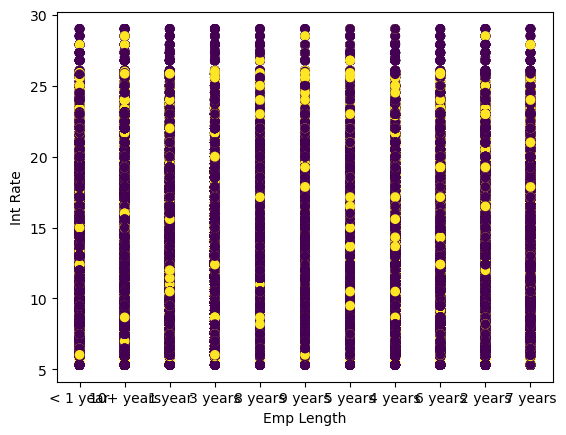

In [31]:
plt.scatter(x=df['emp_length'], y=df['int_rate'], c=df['loan_status'])
plt.xlabel('Emp Length')
plt.ylabel('Int Rate')
plt.show()

In [32]:
pd.crosstab([df['grade'],df['sub_grade']], df['loan_status'], values=df['int_rate'], aggfunc=['mean', 'max', 'min'])

mean               max           min       
loan_status              0          1      0      1      0      1
grade sub_grade                                                  
A     A1          5.628407   5.967254   7.37   7.37   5.32   5.32
      A2          6.384246   6.534867   7.68   7.68   6.24   5.79
      A3          7.027637   7.390453   8.00   8.00   6.68   6.17
      A4          7.415003   7.765902   9.32   9.32   6.54   6.00
      A5          8.146213   8.600713   9.63   9.63   6.91   6.00
B     B1          8.671235   9.690186  11.14  11.14   6.00   6.00
      B2          9.700818  10.672739  11.48  11.48   6.00   6.00
      B3         10.556810  11.617896  12.12  12.12   6.00   6.00
      B4         11.458147  12.385396  13.11  13.11   6.00   6.00
      B5         11.991668  12.924979  14.09  14.09   6.00   6.00
C     C1         12.635102  13.540761  14.33  14.33   6.00   6.00
      C2         13.140532  14.157370  15.31  15.31   6.00   6.00
      C3         13.781831  14.684626  15.80  15.80   6.00   6.00
      C4         14.378194  15.254632  16.29  16.29   6.00   6.00
      C5         15.081726  15.942293  17.27  17.27  11.54   6.00
D     D1         15.862723  16.629515  17.77  17.77   6.00   6.00
      D2         16.682980  17.211846  18.55  18.55   6.00   6.00
      D3         17.196448  17.665009  19.20  19.20   6.00   6.00
      D4         17.774816  18.204162  19.52  19.52   6.00   6.00
      D5         18.260035  18.810988  20.31  20.31   6.00   6.00
E     E1         18.695175  19.176003  21.00  21.00   6.00   6.00
      E2         19.179625  19.905127  21.70  21.70   6.00   6.00
      E3         19.783398  20.454580  22.40  22.40   6.00  14.07
      E4         20.620323  21.164384  23.10  23.10   6.00   6.00
      E5         21.604554  21.861598  23.40  23.40  14.67   6.00
F     F1         22.590261  22.612842  23.70  23.70  15.01  15.01
      F2         23.400110  23.132541  24.08  24.08  15.33  15.33
      F3         24.094216  23.744077  24.50  24.50  15.65  15.65
      F4         24.706135  24.100626  25.09  24.99   6.00  15.96
      F5         25.292290  24.538905  26.06  25.99   6.00   6.00
G     G1         25.780725  24.871435  26.99  26.77  16.59  17.34
      G2         26.051579  24.984124  27.49  27.31  16.91  19.16
      G3         26.164779  25.237524  27.99  27.88  17.22  18.72
      G4         26.011320  25.017137  28.49  28.49  17.54  19.04
      G5         25.880054  25.462457  28.99  28.99  17.86  18.36

In [33]:
df['emp_length'].value_counts()

emp_length
10+ years    288590
2 years       78401
< 1 year      69854
3 years       69406
1 year        56806
5 years       55136
4 years       52036
7 years       44144
8 years       43600
6 years       42539
9 years       34407
Name: count, dtype: int64

In [34]:
df['emp_length']=df['emp_length'].replace('< 1 year','0 years')
df['emp_length']=df['emp_length'].replace('10+ years','10 years')

In [35]:
df['emp_length']=df['emp_length'].apply(lambda x: int(x.split()[0]))

In [36]:
df['emp_length'].value_counts()

emp_length
10    288590
2      78401
0      69854
3      69406
1      56806
5      55136
4      52036
7      44144
8      43600
6      42539
9      34407
Name: count, dtype: int64

In [37]:
df['purpose'].value_counts()

purpose
debt_consolidation    496493
credit_card           193480
home_improvement       47835
other                  39576
major_purchase         16162
small_business          9110
car                     8327
medical                 7852
moving                  5041
vacation                4359
house                   3499
wedding                 2270
renewable_energy         529
educational              386
Name: count, dtype: int64

In [38]:
df['term'].value_counts()

term
 36 months    578764
 60 months    256155
Name: count, dtype: int64

In [39]:
df['term']=df['term'].apply(lambda x: int(x.split()[0]))

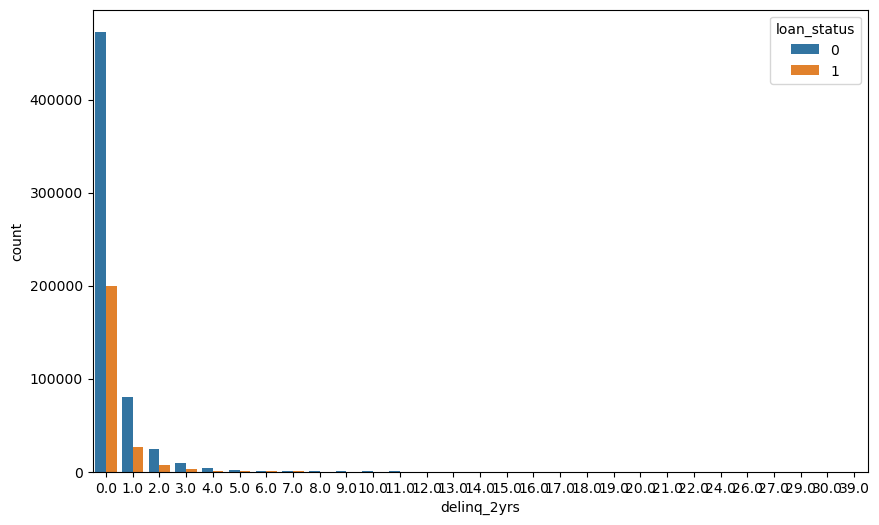

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='delinq_2yrs', hue='loan_status', data=df)
plt.show()

In [41]:
df.emp_title.nunique()

298945

In [42]:
df.drop('emp_title', axis=1, inplace=True)

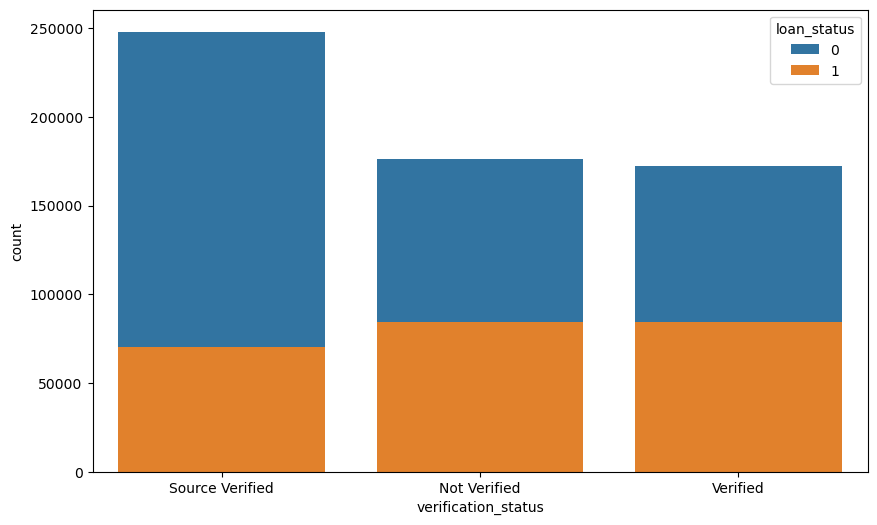

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='verification_status', hue='loan_status', data=df, dodge=False)
plt.show()

In [44]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'title', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

In [45]:
df['title'].nunique()

59214

In [46]:
df.drop('title',axis=1,inplace=True)

In [47]:
df.drop('issue_d',axis=1,inplace=True)

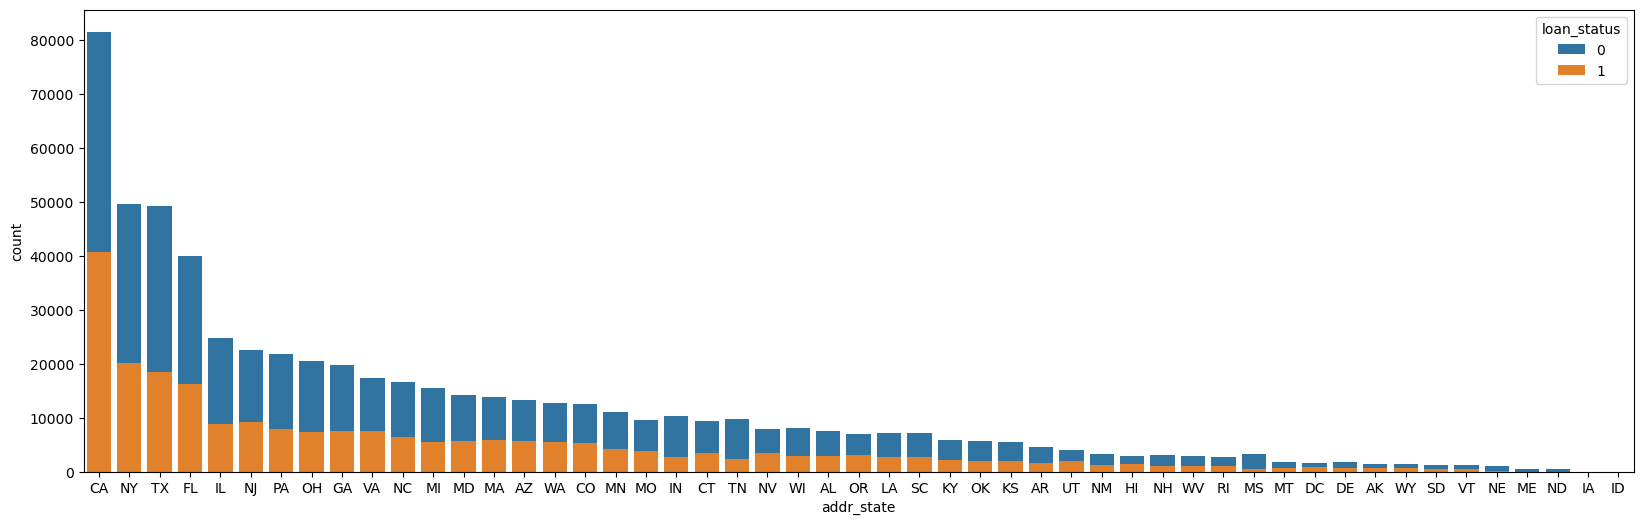

In [48]:
plt.figure(figsize=(20,6))
sns.countplot(x='addr_state',hue='loan_status',data=df,dodge=False, order=df['addr_state'].value_counts().index)
plt.show()

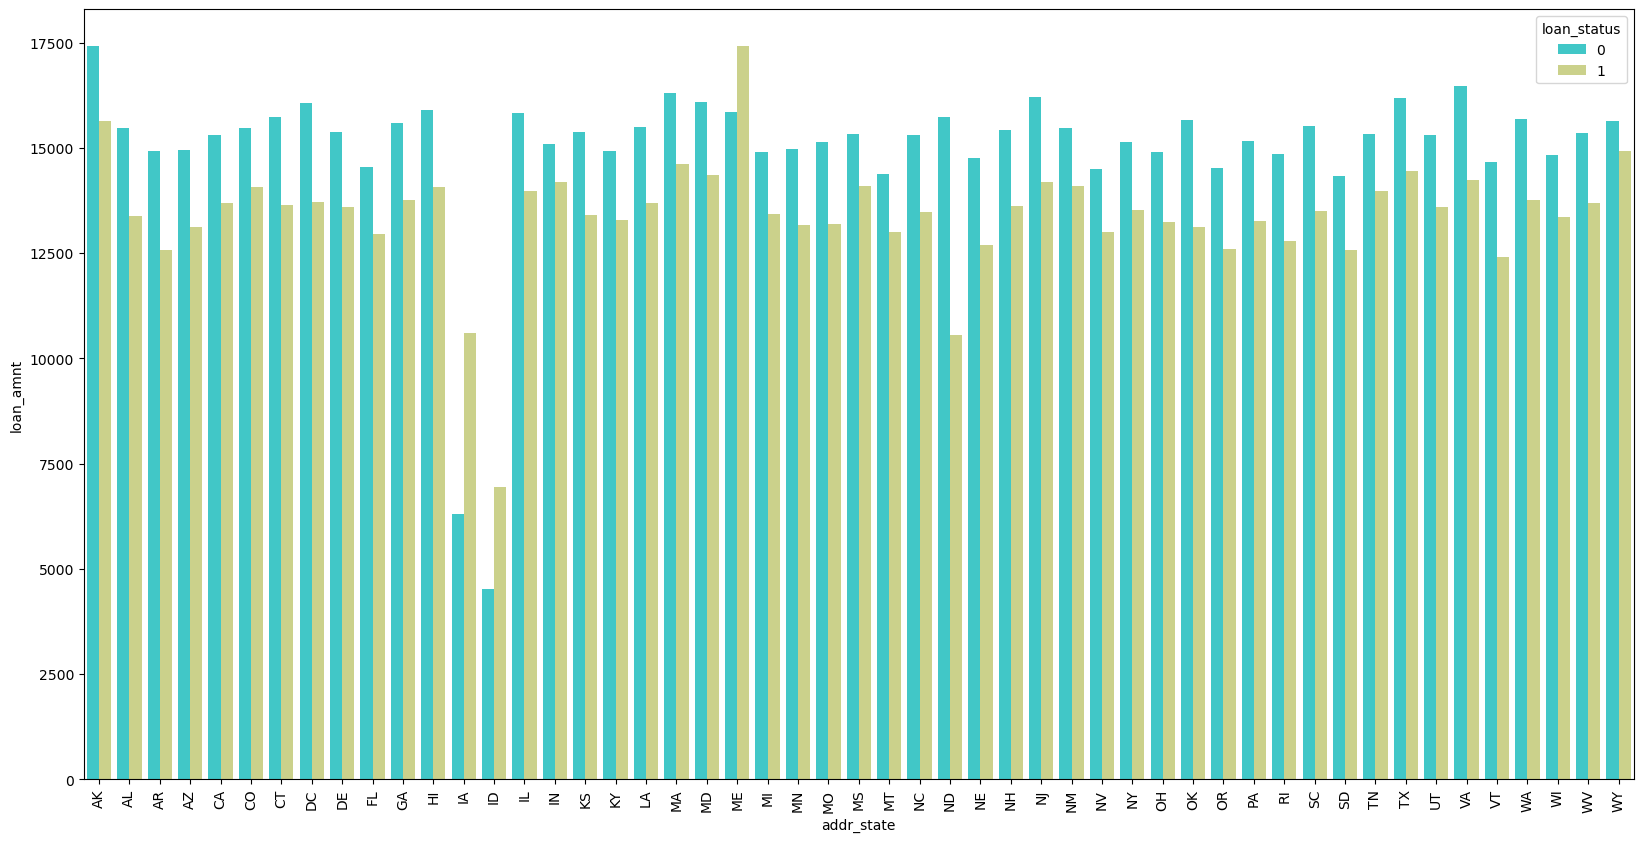

In [49]:
demo_grp = df.groupby(['addr_state','loan_status'])['loan_amnt'].mean()
demo_grp_df = demo_grp.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status', data=demo_grp_df, palette='rainbow')
plt.xticks(rotation=90)
plt.show()

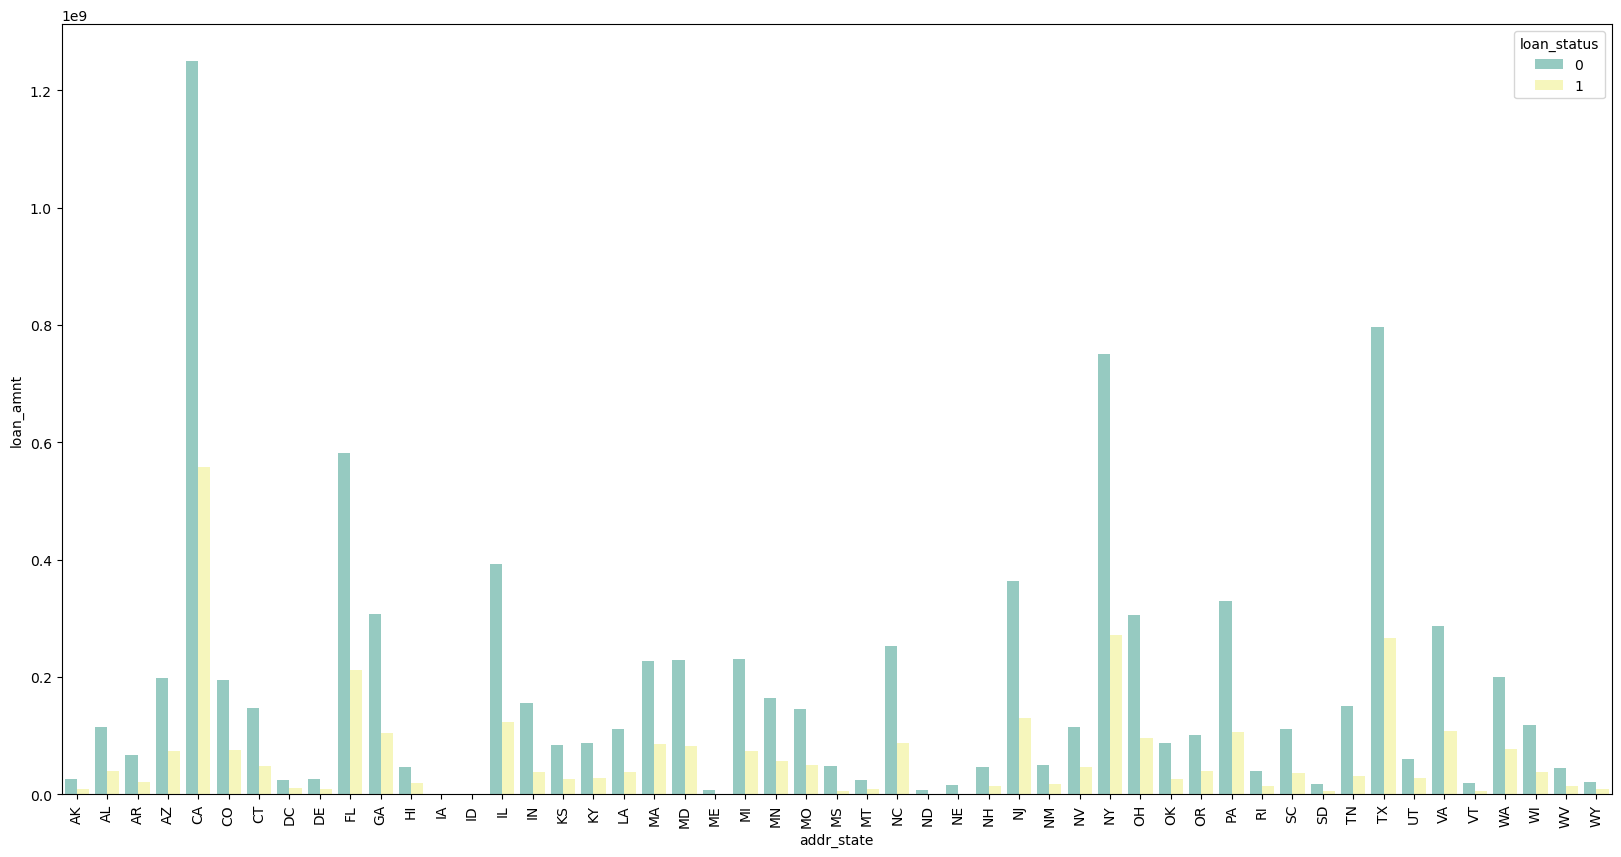

In [50]:
demo_grp = df.groupby(['addr_state','loan_status'])['loan_amnt'].sum()
demo_grp_df = demo_grp.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status', data=demo_grp_df, palette='Set3')
plt.xticks(rotation=90)
plt.show()

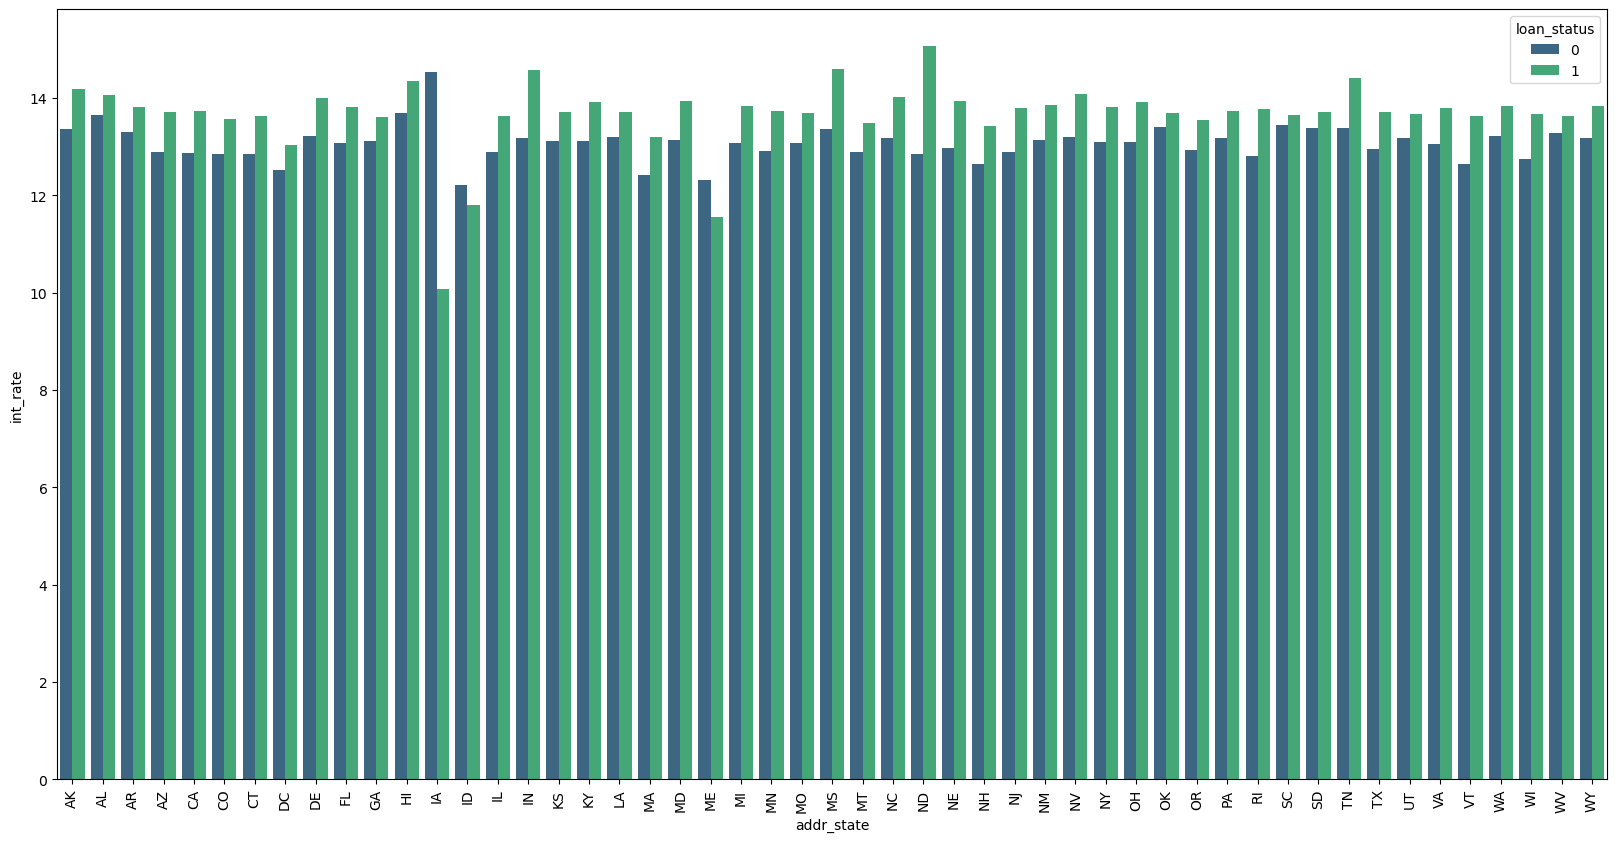

In [51]:
demo_grp = df.groupby(['addr_state','loan_status'])['int_rate'].mean()
demo_grp_df = demo_grp.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='int_rate', hue='loan_status', data=demo_grp_df, palette='viridis')
plt.xticks(rotation=90)
plt.show()

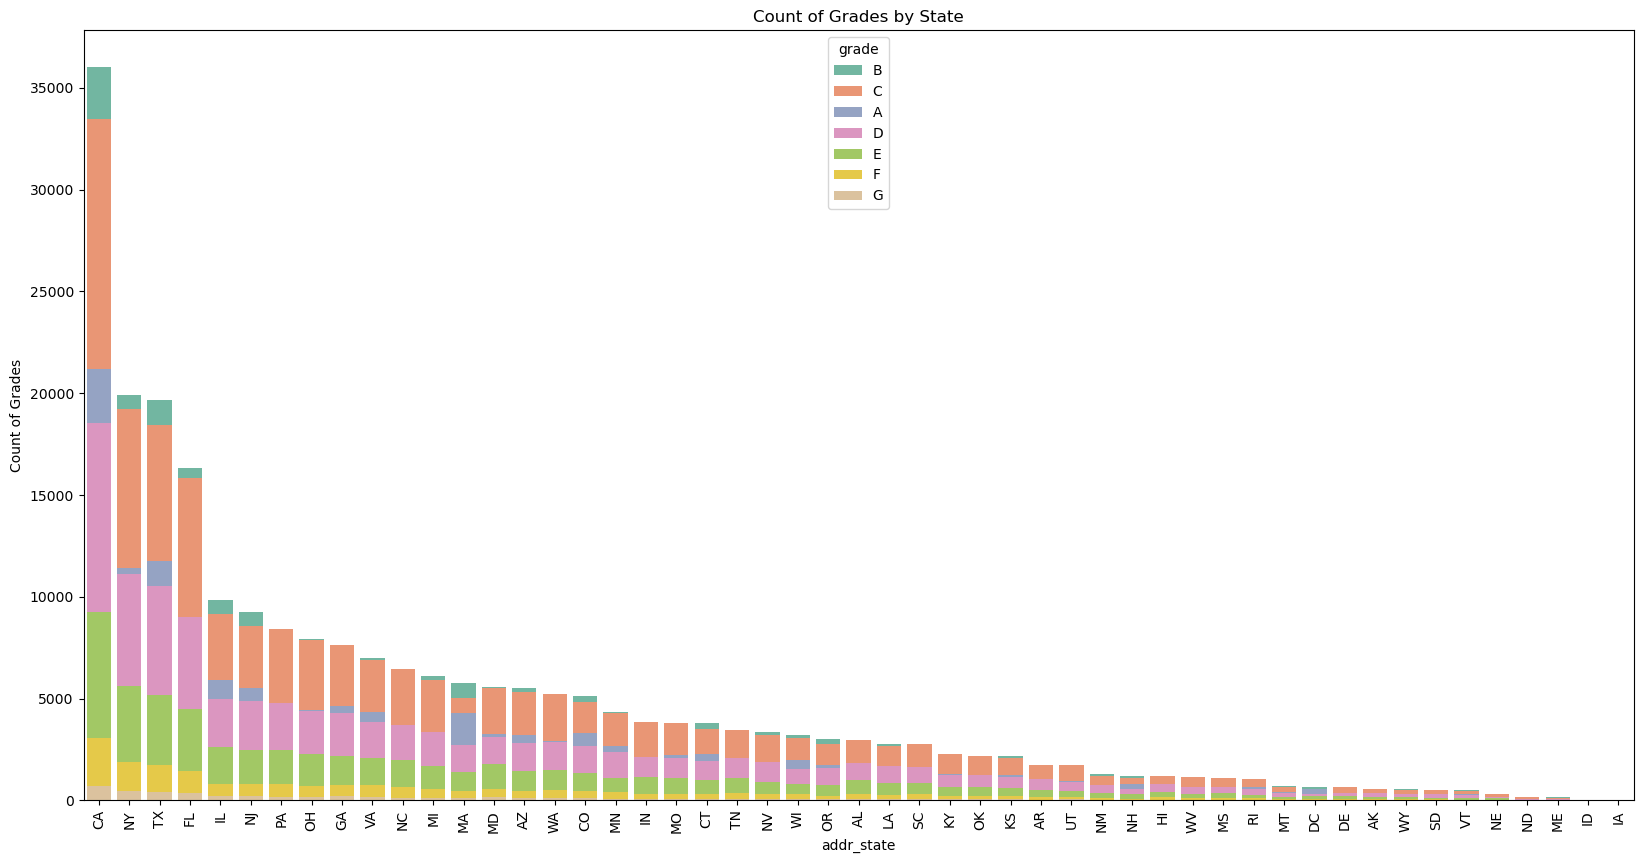

In [52]:
demo_grp = df.groupby(['addr_state','grade'])['grade'].count()
demo_grp_df = demo_grp.reset_index(name='count')
demo_grp_df = demo_grp_df.sort_values('count', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='count', hue='grade', data=demo_grp_df,dodge=False, palette='Set2')
plt.xticks(rotation=90)
plt.ylabel('Count of Grades')
plt.title('Count of Grades by State')
plt.show()

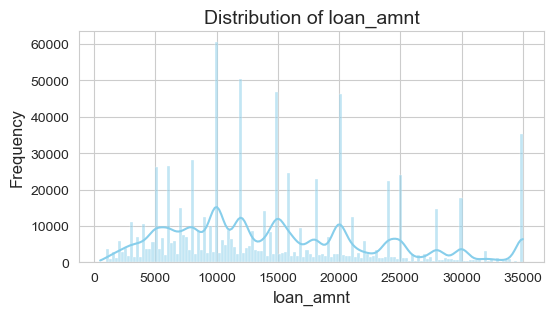

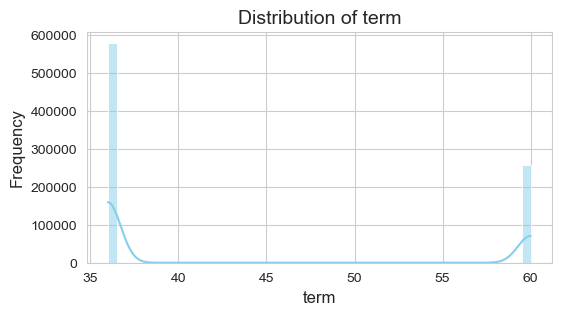

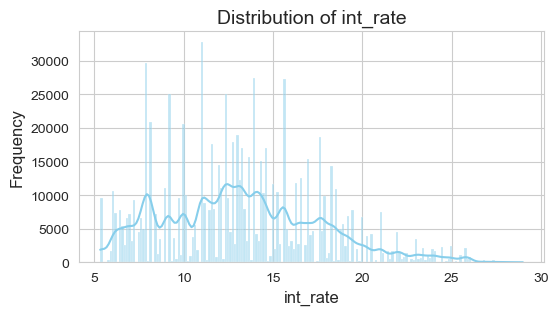

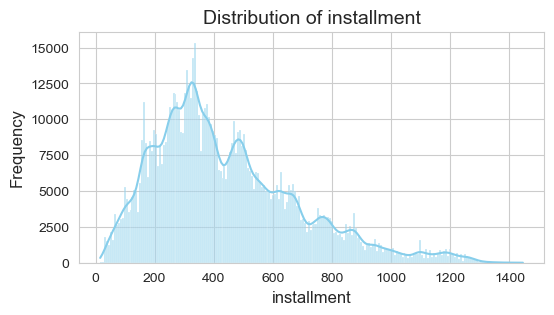

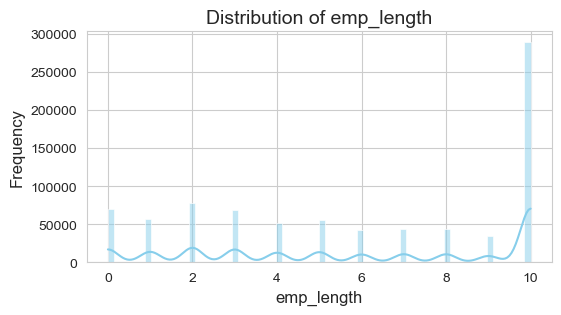

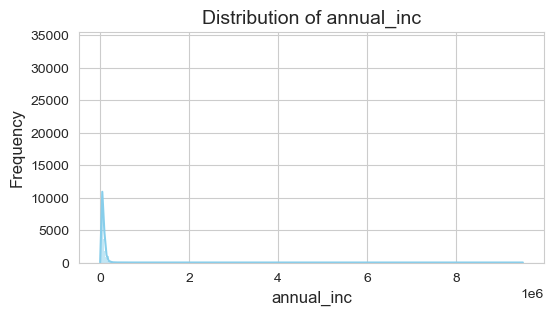

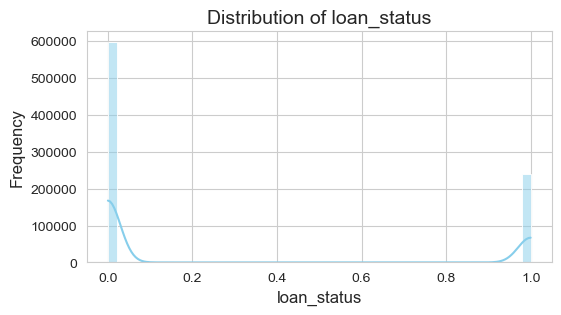

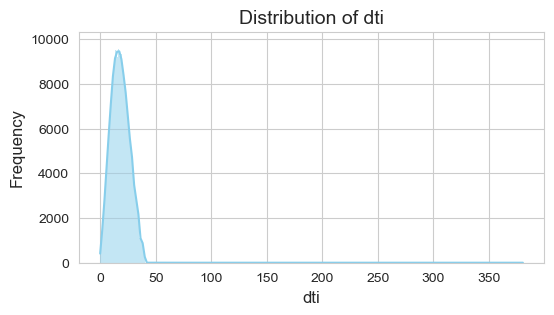

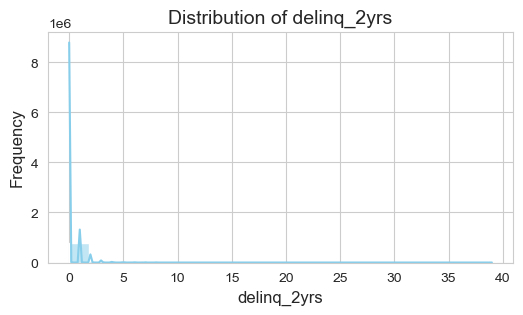

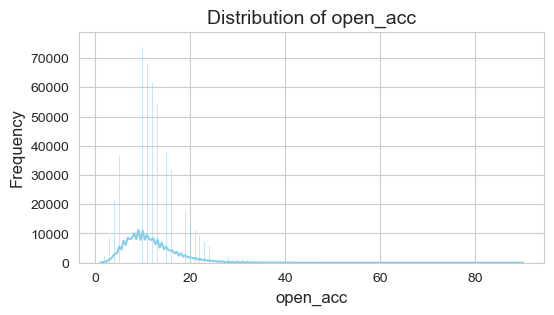

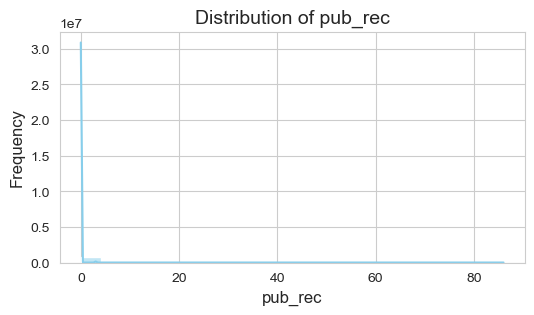

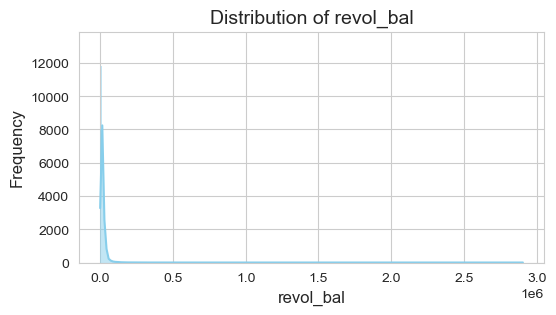

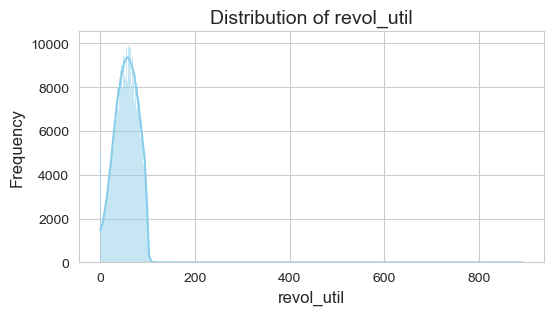

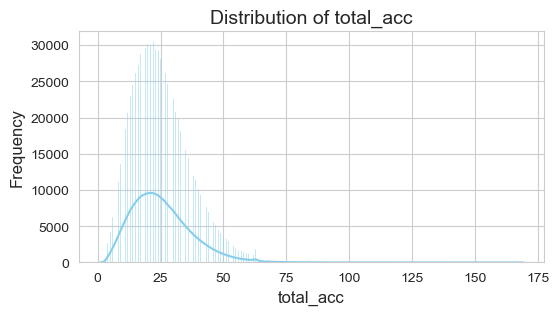

In [53]:
sns.set_style("whitegrid")
for column in df.select_dtypes(include=['float64', 'int64']).columns:
  plt.figure(figsize=(6, 3))
  sns.histplot(df[column], kde=True, color='skyblue')
  plt.title(f"Distribution of {column}", fontsize=14)
  plt.xlabel(column, fontsize=12)
  plt.ylabel("Frequency", fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.show()

In [54]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'application_type'],
      dtype='object')

In [55]:
df.drop('purpose',axis=1,inplace=True)

In [56]:
num_col = df.select_dtypes(include=['float64','int64']).columns
num_col

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

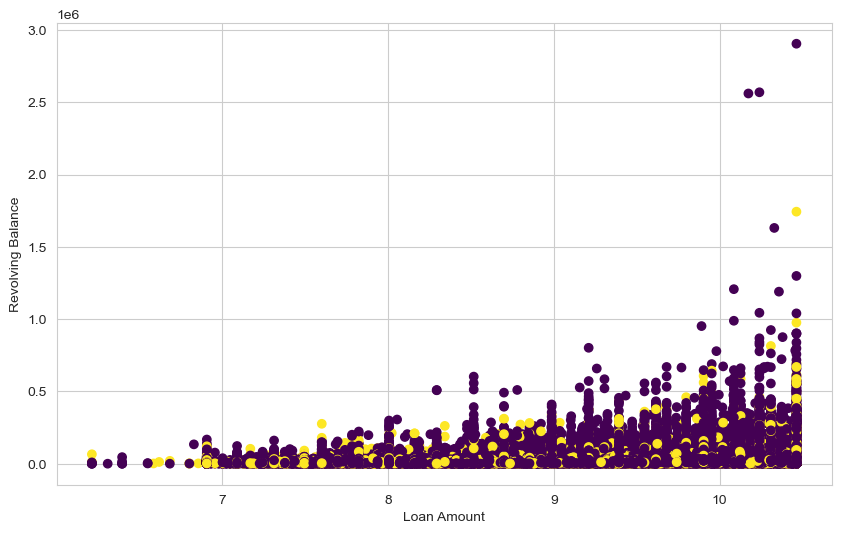

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(x=np.log(df['loan_amnt']), y=df['revol_bal'], c=df['loan_status'],cmap='viridis')
plt.xlabel('Loan Amount')
plt.ylabel('Revolving Balance')
plt.show()

1. Right Side Concentration: The fact that the majority of non-defaulters are concentrated on the right side of the plot indicates that non-defaulters tend to have higher loan amounts. In the context of your log transformation, this means that non-defaulters generally have larger loans compared to defaulters.

2. Financial Behavior: This pattern may suggest that borrowers who take out larger loans are more likely to manage their revolving balances responsibly, resulting in fewer defaults. Alternatively, it could indicate that lenders have stricter criteria for larger loans, leading to better creditworthiness among those who receive them.

3. Risk Segmentation: The exponential relationship combined with the distribution of non-defaulters might allow you to segment borrowers into different risk categories. For instance, borrowers with lower loan amounts (left side of the plot) and high revolving balances might be at higher risk of default, whereas those with higher loan amounts and relatively lower revolving balances might be safer bets.

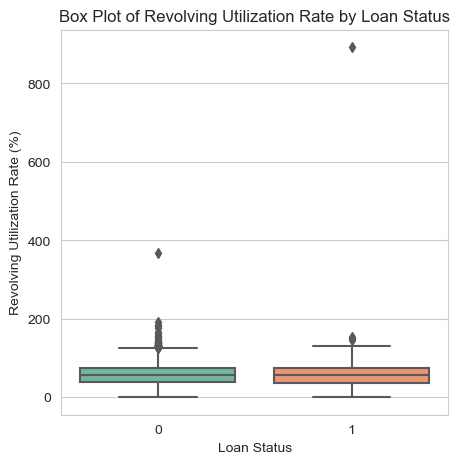

In [58]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='loan_status', y='revol_util', palette='Set2')
plt.title('Box Plot of Revolving Utilization Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Utilization Rate (%)')
plt.show()

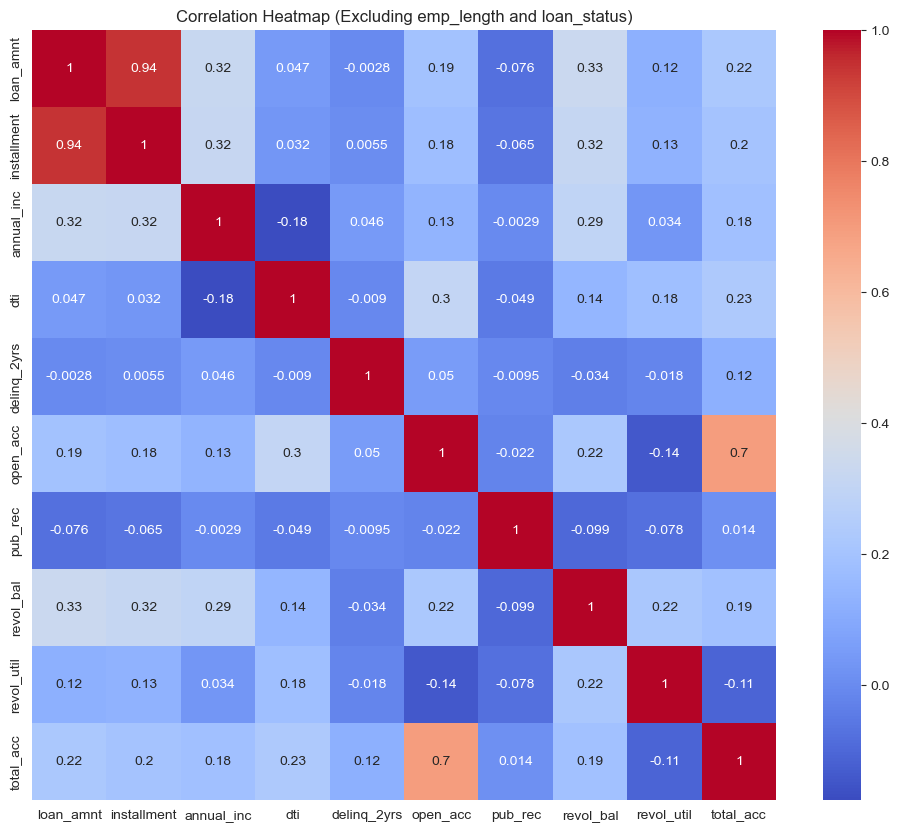

In [59]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['emp_length', 'loan_status','term','int_rate','']]
corr = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Excluding emp_length and loan_status)")
plt.show()

# Credit Risk Modelling
Credit risk modeling is the process of using statistical and machine learning techniques to predict the likelihood that a borrower will default on a loan or credit obligation. The primary goal of credit risk modeling is to quantify the risk associated with lending money to individuals or entities and to make informed decisions that minimize potential losses for financial institutions

## Importance of Credit Risk Modeling:
1. Minimizing Losses: By accurately predicting defaults, lenders can take proactive measures to mitigate losses, such as adjusting interest rates, tightening lending criteria, or setting aside provisions for bad loans.
2. Optimizing Returns: Credit risk models help financial institutions balance risk and reward, allowing them to price loans more effectively and allocate capital efficiently.
3. Supporting Business Decisions: Credit risk modeling provides valuable insights that inform strategic decisions, such as entering new markets, launching new products, or adjusting credit policies.

In [60]:
num_col

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

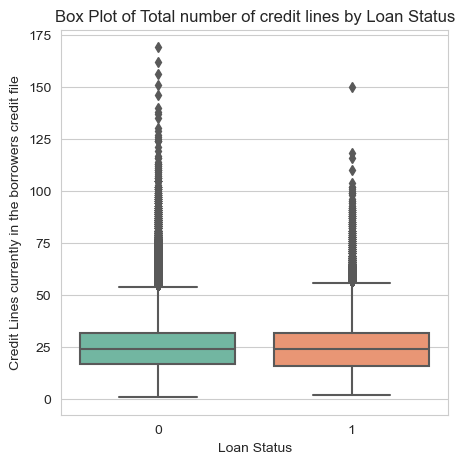

In [61]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='loan_status', y='total_acc', palette='Set2')
plt.title('Box Plot of Total number of credit lines by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Lines currently in the borrowers credit file' )
plt.show()

In [62]:
avg_loan_amt=df['loan_amnt'].mean()
avg_loan_amt

14912.984373334419

In [63]:
df_classifier=df.copy()

In [64]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['emp_length', 'loan_status','term',
                                                               'int_rate','delinq_2yrs','pub_rec',
                                                               'total_acc','open_acc',]]

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [67]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'addr_state', 'earliest_cr_line', 'initial_list_status',
       'application_type'],
      dtype='object')

In [68]:
ohe_col = ['grade','home_ownership','verification_status','application_type']
for col in ohe_col:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)

In [69]:
df=df.drop(['grade','home_ownership','verification_status','application_type'],axis=1)

In [70]:
bool_col = df.select_dtypes(include='bool').columns
df[bool_col] = df[bool_col].astype(int)

In [71]:
df=df.drop(['addr_state'],axis=1)

In [72]:
df=pd.concat([df,pd.get_dummies(df['sub_grade'], prefix=col)], axis=1)

In [73]:
df=df.drop(['sub_grade'],axis=1)

In [74]:
bool_col = df.select_dtypes(include='bool').columns
df[bool_col] = df[bool_col].astype(int)

In [75]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda s: pd.to_datetime(s[-4:]))

In [76]:
df['earliest_cr_line']=df['earliest_cr_line'].dt.year

In [77]:
df=pd.concat([df,pd.get_dummies(df['initial_list_status'], prefix='initial_list_status')], axis=1)

In [78]:
bool_col = df.select_dtypes(include='bool').columns
df[bool_col] = df[bool_col].astype(int)
df=df.drop(['initial_list_status'],axis=1)

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
df.shape

(834919, 70)

In [82]:
X=df.drop('loan_status',axis=1)

In [83]:
y=df[['loan_status']]

In [84]:
print(X.shape,y.shape)

(834919, 69) (834919, 1)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=123)

In [86]:
clf_logistic = LogisticRegression(solver='lbfgs')

In [87]:
clf_logistic.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [88]:
preds = clf_logistic.predict_proba(X_test)

In [89]:
preds

array([[0.80134214, 0.19865786],
       [0.84804547, 0.15195453],
       [0.83230193, 0.16769807],
       ...,
       [0.75261848, 0.24738152],
       [0.58923836, 0.41076164],
       [0.49234167, 0.50765833]])

In [90]:
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
true_df = y_test

In [91]:
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

        loan_status  prob_default
0                 0      0.198658
1                 0      0.151955
2                 0      0.167698
3                 0      0.221176
4                 0      0.107347
...             ...           ...
333963            1      0.377263
333964            1      0.726908
333965            0      0.247382
333966            1      0.410762
333967            0      0.507658

[333968 rows x 2 columns]


In [92]:
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

In [93]:
preds_df.head()

,prob_default,loan_status
0,0.198658,0
1,0.151955,0
2,0.167698,0
3,0.221176,0
4,0.107347,0


In [94]:
preds_df['loan_status'].value_counts()

loan_status
0    299265
1     34703
Name: count, dtype: int64

In [95]:
from sklearn.metrics import classification_report

In [96]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.74      0.93      0.83    238260
     Default       0.53      0.19      0.28     95708

    accuracy                           0.72    333968
   macro avg       0.64      0.56      0.56    333968
weighted avg       0.68      0.72      0.67    333968



In [97]:
clf_logistic.score(X_test,y_test)

0.7205151391750108

In [98]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [99]:
prob_default_lr=preds[:,1]

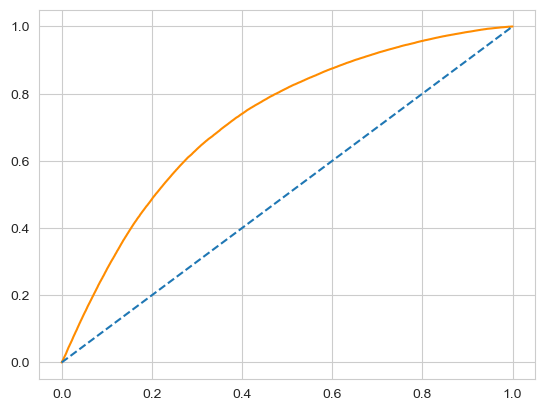

In [100]:
fallout, sensitivity, threshold = roc_curve(y_test,prob_default_lr)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [101]:
auc = roc_auc_score(y_test, prob_default_lr)

In [102]:
auc

0.7214993018265556

# How thresholds affect performance
Setting the threshold to 0.4 shows promising results for model evaluation. Now you can assess the financial impact using the default recall which is selected from the classification reporting using the function precision_recall_fscore_support().

For this, you will estimate the amount of unexpected loss using the default recall to find what proportion of defaults you did not catch with the new threshold. This will be a dollar amount which tells you how much in losses you would have if all the unfound defaults were to default all at once.

The average loan value, avg_loan_amnt has been calculated and made available in the workspace along with preds_df and y_test.

In [103]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

thresholds = np.arange(0.2, 0.85, 0.05)
avg_loan_amt = 15000

def_recall_list = []
non_def_recall_list = []
num_default_list = []
loss_list = []
accuracy_list = []

pred_proba = clf_logistic.predict_proba(X_test)[:, 1]

for thresh in thresholds:
    pred_df = pd.DataFrame(pred_proba, columns=['Default_prob'])
    pred_df['loan_status'] = pred_df['Default_prob'].apply(lambda x: 1 if x > thresh else 0)

    def_recall = precision_recall_fscore_support(y_test, pred_df['loan_status'])[1][1]
    non_def_recall = precision_recall_fscore_support(y_test, pred_df['loan_status'])[1][0]
    num_default = pred_df['loan_status'].sum()
    loss = avg_loan_amt * num_default * (1 - def_recall)
    def_recall_list.append(def_recall)
    non_def_recall_list.append(non_def_recall)
    num_default_list.append(num_default)
    loss_list.append(loss)
    accuracy = accuracy_score(y_test, pred_df['loan_status'])
    accuracy_list.append(accuracy)

for i, thresh in enumerate(thresholds):
    print(f"Threshold: {thresh:.2f}, Default Recall: {def_recall_list[i]:.4f}, Non-default Recall: {non_def_recall_list[i]:.4f}, Accuracy: {accuracy_list[i]:.4f}, No_default: {num_default_list[i]}, Loss due to threshold: {loss_list[i]:.2f}")


Threshold: 0.20, Default Recall: 0.8575, Non-default Recall: 0.4316, Accuracy: 0.5536, No_default: 217504, Loss due to threshold: 464901505.41
Threshold: 0.25, Default Recall: 0.7711, Non-default Recall: 0.5629, Accuracy: 0.6226, No_default: 177943, Loss due to threshold: 610867974.26
Threshold: 0.30, Default Recall: 0.6675, Non-default Recall: 0.6718, Accuracy: 0.6705, No_default: 142090, Loss due to threshold: 708675879.24
Threshold: 0.35, Default Recall: 0.5501, Non-default Recall: 0.7608, Accuracy: 0.7004, No_default: 109649, Loss due to threshold: 740017329.48
Threshold: 0.40, Default Recall: 0.4238, Non-default Recall: 0.8341, Accuracy: 0.7165, No_default: 80083, Loss due to threshold: 692170552.72
Threshold: 0.45, Default Recall: 0.3001, Non-default Recall: 0.8904, Accuracy: 0.7212, No_default: 54839, Loss due to threshold: 575701206.33
Threshold: 0.50, Default Recall: 0.1937, Non-default Recall: 0.9321, Accuracy: 0.7205, No_default: 34703, Loss due to threshold: 419729789.99
Th

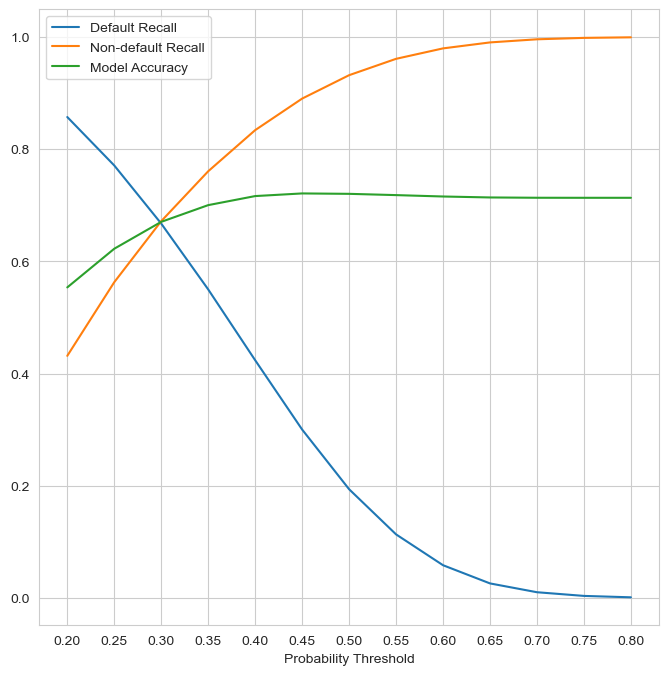

In [104]:
plt.figure(figsize=(8,8))
plt.plot(thresholds, def_recall_list, label="Default Recall")
plt.plot(thresholds, non_def_recall_list, label="Non-default Recall")
plt.plot(thresholds, accuracy_list, label="Model Accuracy")
plt.xlabel("Probability Threshold")
plt.xticks(thresholds) 
plt.legend()
plt.show()

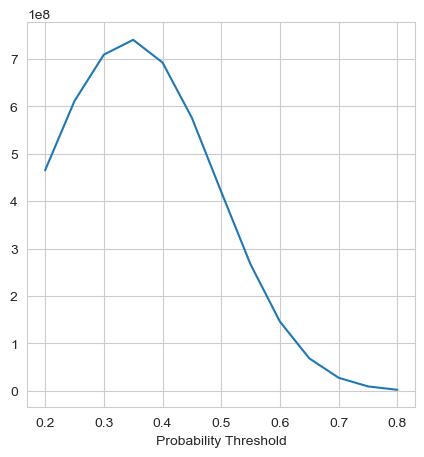

In [105]:
plt.figure(figsize=(5,5))
plt.plot(thresholds,loss_list,label="Loss Due to Threshold")
plt.xlabel("Probability Threshold")
plt.show()

In [106]:
df_classifier.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type'],
      dtype='object')

# Other Classification Models

In [107]:
import xgboost
from xgboost import XGBClassifier

In [108]:
X_cl=df_classifier.drop('loan_status',axis=1)
y_cl=df_classifier[['loan_status']]

In [109]:
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl,y_cl,test_size=0.4,random_state=123)

In [110]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

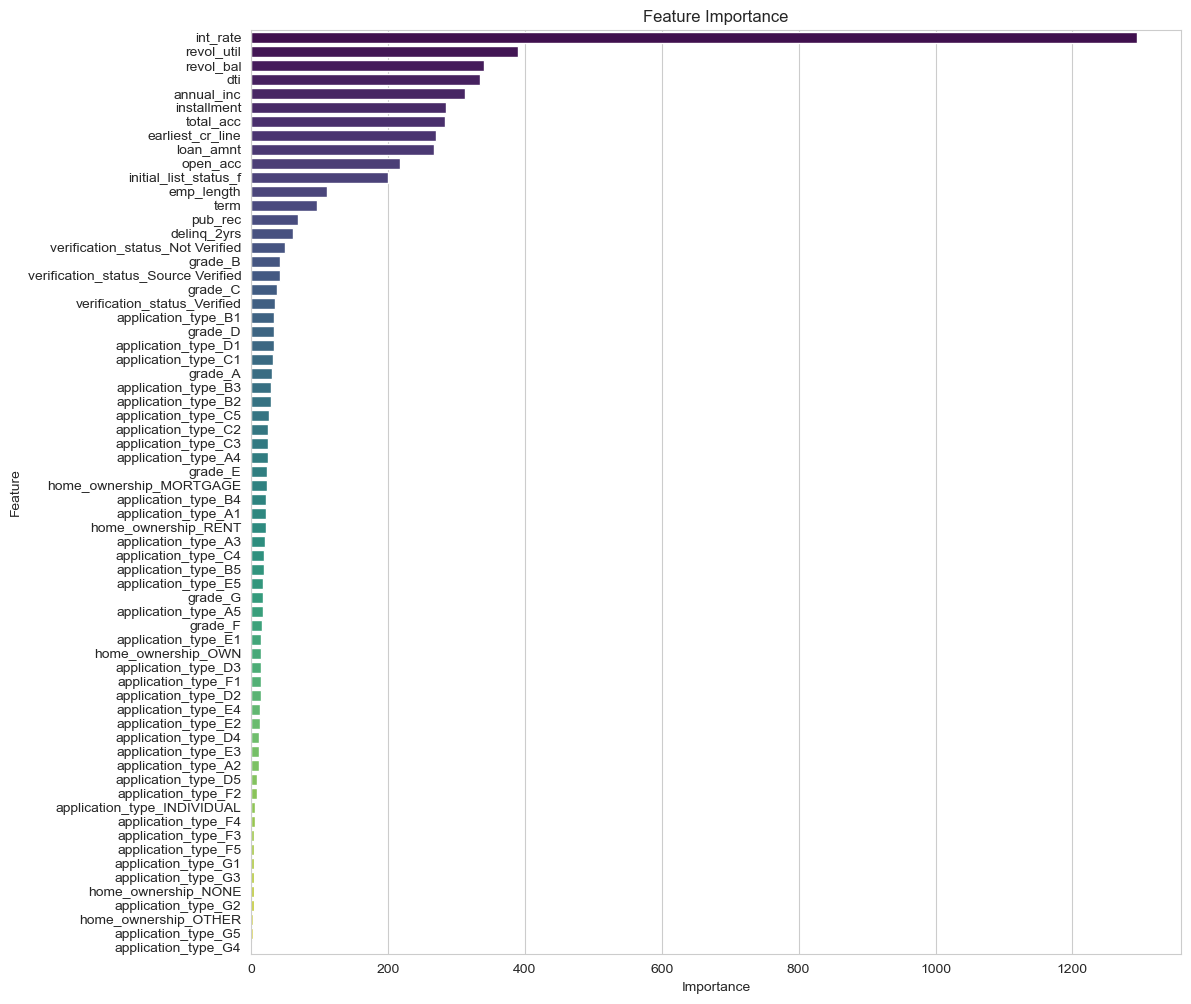

In [111]:
feat_imps = xgb.get_booster().get_score(importance_type='weight')
keys = list(feat_imps.keys())
values = list(feat_imps.values())
feat_imps_df = pd.DataFrame(data=values, index=keys, columns=["Importance"]).sort_values(by="Importance",ascending=False).reset_index()
feat_imps_df.rename({'index': 'Feature'},axis=1,inplace=True)
plt.figure(figsize=(12,12))
fig = sns.barplot(x='Importance',y='Feature',data=feat_imps_df,orient='horizontal',palette='viridis')
plt.title("Feature Importance")
plt.show(fig)
plt.close('all')

In [112]:
n_col_list = list(feat_imps_df['Feature'][0:51])

In [113]:
X_col = X[n_col_list]

In [114]:
y.head()

,loan_status
1,1
3,1
4,0
5,1
6,0


In [115]:
y_col = y.copy()

In [116]:
print(X_col.shape,y_col.shape)

(834919, 51) (834919, 1)


In [117]:
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_col,y_col,test_size=0.4,random_state=123)

In [118]:
clf_gbt = xgb.fit(X_cl_train,np.ravel(y_cl_train))

In [119]:
gbt_pred = clf_gbt.predict_proba(X_cl_test)

In [120]:
gbt_pred

array([[0.91178316, 0.08821685],
       [0.27746612, 0.7225339 ],
       [0.9262561 , 0.07374389],
       ...,
       [0.9103238 , 0.0896762 ],
       [0.15890402, 0.841096  ],
       [0.21111578, 0.7888842 ]], dtype=float32)

In [121]:
gbt_pred_df = pd.DataFrame(gbt_pred[:,1],columns = ['prob_default'])

In [122]:
gbt_pred_df['loan_status']=gbt_pred_df['prob_default'].apply(lambda x: 1 if x>0.5 else 0)

In [123]:
gbt_pred_df['loan_status'].value_counts()

loan_status
0    260338
1     73630
Name: count, dtype: int64

In [124]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_cl_test, gbt_pred_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.83      0.91      0.87    238260
     Default       0.71      0.55      0.62     95708

    accuracy                           0.81    333968
   macro avg       0.77      0.73      0.74    333968
weighted avg       0.80      0.81      0.80    333968



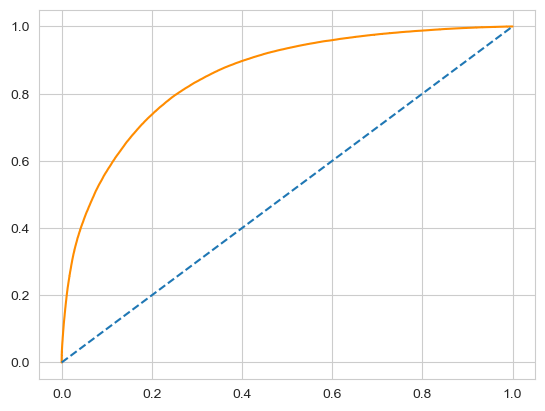

In [125]:
prob_def_gbt = gbt_pred[:,1]
fallout, sensitivity, threshold = roc_curve(y_cl_test,prob_def_gbt)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [126]:
auc = roc_auc_score(y_cl_test, prob_def_gbt)
auc

0.8525359268235547

In [127]:
X_cl2_train, X_cl2_test, y_cl2_train, y_cl2_test = train_test_split(X,y,test_size=0.4,random_state=123)
clf_gbt2 = xgb.fit(X_cl2_train,np.ravel(y_cl2_train))
gbt2_pred = clf_gbt2.predict_proba(X_cl2_test)
gbt2_pred_df = pd.DataFrame(gbt2_pred[:,1],columns = ['prob_default'])
gbt2_pred_df['loan_status']=gbt2_pred_df['prob_default'].apply(lambda x: 1 if x>0.5 else 0)
print(classification_report(y_cl2_test, gbt2_pred_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.83      0.91      0.87    238260
     Default       0.71      0.55      0.62     95708

    accuracy                           0.80    333968
   macro avg       0.77      0.73      0.74    333968
weighted avg       0.80      0.80      0.80    333968



In [128]:
from sklearn.metrics import roc_curve, auc

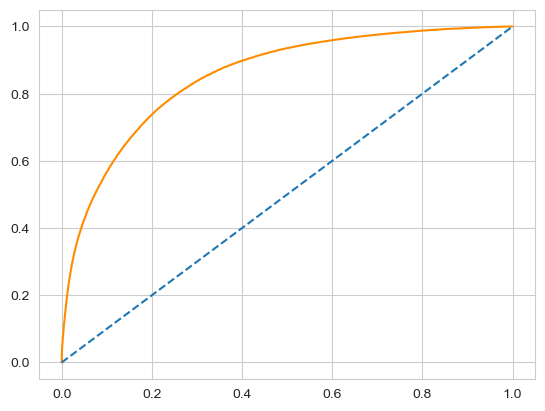

In [129]:
gbt2_pred_df = gbt2_pred[:,1]
fallout, sensitivity, threshold = roc_curve(y_cl2_test,gbt2_pred_df)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [130]:
auc = auc(fallout, sensitivity)
auc

0.8518925444038665

In [131]:
auc = roc_auc_score(y_cl2_test, gbt2_pred_df)
auc

0.8518925444038665

# Hyper-parameter Tuning

In [132]:
from sklearn.model_selection import cross_val_score
xg=XGBClassifier(learning_rate=0.4, max_depth=10)
cross_val = cross_val_score(xg,X_cl_train,y_cl_train,cv=5)

In [133]:
print(round(np.mean(cross_val),2))

0.8


In [134]:
xg=XGBClassifier(learning_rate=0.4, max_depth=10)
cross_val_2 = cross_val_score(xg,X_cl2_train,y_cl2_train,cv=5)

In [135]:
cross_val_2

array([0.79806569, 0.79838307, 0.7994211 , 0.79661643, 0.79782413])

In [136]:
np.mean(cross_val_2)

0.7980620859053907

In [137]:
space = {'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
      'gamma': [0, 0.1, 0.5]}

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
#grid_search  = GridSearchCV(estimator=xgb, param_grid=space, scoring='recall',cv=5, verbose=1)
#grid_search.fit(X_cl_train,y_cl_train)

In [140]:
#best_para = grid_search.best_params_
#best_para

In [141]:
xg1=XGBClassifier(gamma=0.5,learning_rate=0.01, max_depth=10,n_estimators=1000)
cross_val_3 = cross_val_score(xg1,X_cl_train,y_cl_train,cv=5)

In [142]:
np.mean(cross_val_3)

0.8049390059636259

In [143]:
clf_gbt3 = xg1.fit(X_cl_train,np.ravel(y_cl_train))
gbt3_pred = clf_gbt3.predict_proba(X_cl_test)
gbt3_pred_df = pd.DataFrame(gbt3_pred[:,1],columns = ['prob_default'])
gbt3_pred_df['loan_status']=gbt3_pred_df['prob_default'].apply(lambda x: 1 if x>0.5 else 0)
print(classification_report(y_cl_test, gbt3_pred_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.83      0.92      0.87    238260
     Default       0.72      0.53      0.61     95708

    accuracy                           0.81    333968
   macro avg       0.78      0.72      0.74    333968
weighted avg       0.80      0.81      0.80    333968



In [144]:
auc = roc_auc_score(y_cl_test, gbt3_pred[:,1])
auc

0.853236737990033

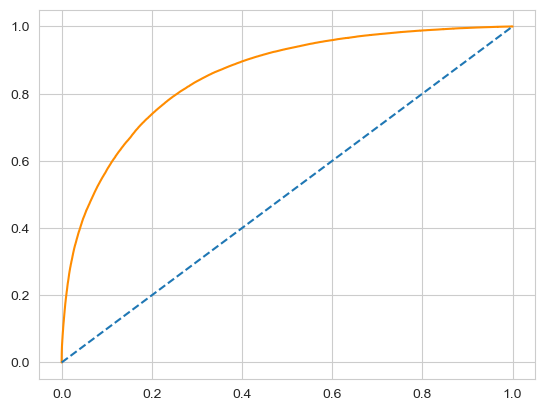

In [145]:
fallout, sensitivity, threshold = roc_curve(y_cl_test,gbt3_pred[:,1])
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [146]:
clf_gbt3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [147]:
thresholds = np.arange(0.2, 0.85, 0.05)
avg_loan_amt = 15000

def_recall_list = []
non_def_recall_list = []
num_default_list = []
loss_list = []
accuracy_list = []

pred_proba = clf_gbt3.predict_proba(X_cl_test)[:, 1]

for thresh in thresholds:
    pred_df = pd.DataFrame(pred_proba, columns=['Default_prob'])
    pred_df['loan_status'] = pred_df['Default_prob'].apply(lambda x: 1 if x > thresh else 0)

    def_recall = precision_recall_fscore_support(y_cl_test, pred_df['loan_status'])[1][1]
    non_def_recall = precision_recall_fscore_support(y_cl_test, pred_df['loan_status'])[1][0]
    num_default = pred_df['loan_status'].sum()
    loss = avg_loan_amt * num_default * (1 - def_recall)
    def_recall_list.append(def_recall)
    non_def_recall_list.append(non_def_recall)
    num_default_list.append(num_default)
    loss_list.append(loss)
    accuracy = accuracy_score(y_cl_test, pred_df['loan_status'])
    accuracy_list.append(accuracy)

for i, thresh in enumerate(thresholds):
    print(f"Threshold: {thresh:.2f}, Default Recall: {def_recall_list[i]:.4f}, Non-default Recall: {non_def_recall_list[i]:.4f}, Accuracy: {accuracy_list[i]:.4f}, No_default: {num_default_list[i]}, Loss due to threshold: {loss_list[i]:.2f}")


Threshold: 0.20, Default Recall: 0.8713, Non-default Recall: 0.6468, Accuracy: 0.7111, No_default: 167546, Loss due to threshold: 323378765.10
Threshold: 0.25, Default Recall: 0.8263, Non-default Recall: 0.7134, Accuracy: 0.7458, No_default: 147362, Loss due to threshold: 383986805.49
Threshold: 0.30, Default Recall: 0.7758, Non-default Recall: 0.7681, Accuracy: 0.7703, No_default: 129508, Loss due to threshold: 435601703.31
Threshold: 0.35, Default Recall: 0.7218, Non-default Recall: 0.8138, Accuracy: 0.7874, No_default: 113456, Loss due to threshold: 473452499.69
Threshold: 0.40, Default Recall: 0.6613, Non-default Recall: 0.8530, Accuracy: 0.7981, No_default: 98304, Loss due to threshold: 499490483.55
Threshold: 0.45, Default Recall: 0.5984, Non-default Recall: 0.8881, Accuracy: 0.8051, No_default: 83921, Loss due to threshold: 505562032.12
Threshold: 0.50, Default Recall: 0.5315, Non-default Recall: 0.9175, Accuracy: 0.8069, No_default: 70527, Loss due to threshold: 495648410.84
Th

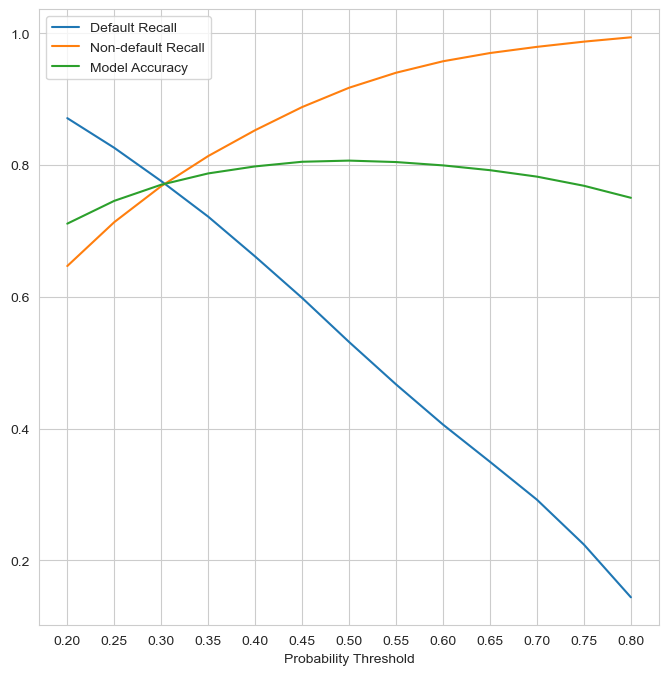

In [148]:
plt.figure(figsize=(8,8))
plt.plot(thresholds, def_recall_list, label="Default Recall")
plt.plot(thresholds, non_def_recall_list, label="Non-default Recall")
plt.plot(thresholds, accuracy_list, label="Model Accuracy")
plt.xlabel("Probability Threshold")
plt.xticks(thresholds) 
plt.legend()
plt.show()

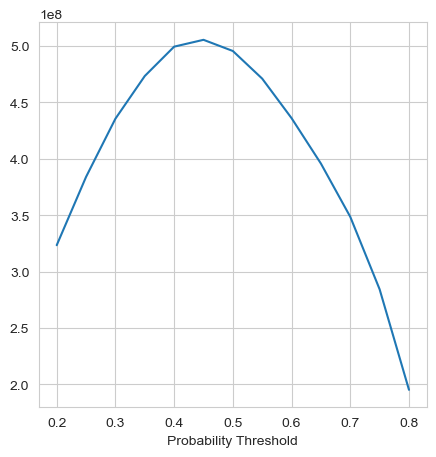

In [149]:
plt.figure(figsize=(5,5))
plt.plot(thresholds,loss_list,label="Loss Due to Threshold")
plt.xlabel("Probability Threshold")
plt.show()

# Under Sampling

In [150]:
print(X.shape, y.shape)

(834919, 69) (834919, 1)


In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=123)

In [152]:
X_y = pd.concat([X_train.reset_index(drop=True),y_train.reset_index(drop=True)],axis=1)

In [153]:
X_y['loan_status'].value_counts()

loan_status
0    357936
1    143015
Name: count, dtype: int64

In [154]:
defaults = X_y[X_y['loan_status']==1]
nondefaults = X_y[X_y['loan_status']==0]

In [155]:
count_nondefault, count_default  = X_y['loan_status'].value_counts()

In [156]:
nondefaults_under = nondefaults.sample(count_default)

In [157]:
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop=True),defaults.reset_index(drop=True)],axis=0)

In [158]:
X_y_train_under['loan_status'].value_counts()

loan_status
0    143015
1    143015
Name: count, dtype: int64

In [159]:
X_y_train_under.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,open_acc,...,application_type_F4,application_type_F5,application_type_G1,application_type_G2,application_type_G3,application_type_G4,application_type_G5,initial_list_status_f,initial_list_status_w,loan_status
0,-0.818937,36,7.89,-0.779003,7,-0.323738,1.871422,0.0,2004,19.0,...,0,0,0,0,0,0,0,0,1,0
1,-0.582010,36,7.89,-0.522713,0,-0.132977,-1.746888,0.0,1998,4.0,...,0,0,0,0,0,0,0,0,1,0
2,0.958017,60,12.29,0.305264,10,-0.171129,2.015236,0.0,1998,10.0,...,0,0,0,0,0,0,0,0,1,0
3,-0.345082,36,12.69,-0.155378,10,-0.445825,-0.468273,0.0,1994,10.0,...,0,0,0,0,0,0,0,0,1,0
4,-0.582010,36,13.67,-0.410809,9,-0.512973,1.506449,0.0,1994,10.0,...,0,0,0,0,0,0,0,0,1,0


In [160]:
X_under_train=X_y_train_under.drop('loan_status',axis=1)
y_under_train=X_y_train_under[['loan_status']]

In [161]:
print(X_under_train.shape,y_under_train.shape)

(286030, 69) (286030, 1)


In [162]:
clf_un_gbt = xgb.fit(X_under_train,np.ravel(y_under_train))
un_gbt_pred = clf_un_gbt.predict_proba(X_test)
un_gbt_pred_df = pd.DataFrame(un_gbt_pred[:,1],columns = ['prob_default'])
un_gbt_pred_df['loan_status']=un_gbt_pred_df['prob_default'].apply(lambda x: 1 if x>0.5 else 0)
print(classification_report(y_test, un_gbt_pred_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.90      0.75      0.82    238260
     Default       0.56      0.79      0.66     95708

    accuracy                           0.76    333968
   macro avg       0.73      0.77      0.74    333968
weighted avg       0.80      0.76      0.77    333968



In [163]:
clf_un_lr = clf_logistic.fit(X_under_train,np.ravel(y_under_train))
un_lr_pred = clf_un_lr.predict_proba(X_test)
un_lr_pred_df = pd.DataFrame(un_lr_pred[:,1],columns = ['prob_default'])
un_lr_pred_df['loan_status']=un_lr_pred_df['prob_default'].apply(lambda x: 1 if x>0.5 else 0)
print(classification_report(y_test, un_lr_pred_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.84      0.65      0.73    238260
     Default       0.44      0.70      0.54     95708

    accuracy                           0.66    333968
   macro avg       0.64      0.67      0.64    333968
weighted avg       0.73      0.66      0.68    333968



# Final Model for GBT (thresh = 0.35)

In [164]:
clf_gbt3 = xg1.fit(X_cl_train,np.ravel(y_cl_train))
gbt3_pred = clf_gbt3.predict_proba(X_cl_test)
gbt3_pred_df = pd.DataFrame(gbt3_pred[:,1],columns = ['prob_default'])
gbt3_pred_df['loan_status']=gbt3_pred_df['prob_default'].apply(lambda x: 1 if x>0.35 else 0)
print(classification_report(y_cl_test, gbt3_pred_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.88      0.81      0.85    238260
     Default       0.61      0.72      0.66     95708

    accuracy                           0.79    333968
   macro avg       0.74      0.77      0.75    333968
weighted avg       0.80      0.79      0.79    333968



# Model Evaluation and Comparision

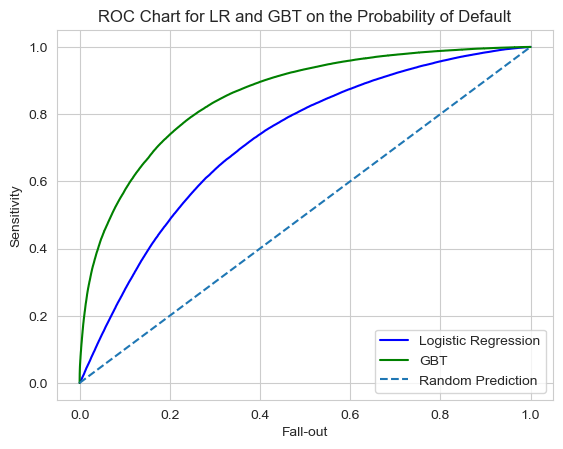

In [165]:
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, prob_default_lr)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_cl_test, gbt3_pred[:,1])

plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

1. The ROC curve shifts with threshold changes because it reflects TPR and FPR at different points.
2. The AUC remains constant as it summarizes the performance across all thresholds.

In [166]:
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, prob_default_lr))

print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_cl_test, gbt3_pred[:,1]))

Logistic Regression AUC Score: 0.72
Gradient Boosted Tree AUC Score: 0.85


You should use ROC charts and AUC scores to compare the two models. Sometimes, visuals can really help you and potential business users understand the differences between the various models under consideration.

With the graph in mind, you will be more equipped to make a decision. The lift is how far the curve is from the random prediction. The AUC is the area between the curve and the random prediction. The model with more lift, and a higher AUC, is the one that's better at making predictions accurately.

# Model Calibration Curve

In [167]:
from sklearn.calibration import calibration_curve

In [168]:
frac_positive_gbt,mean_pred_prob_gbt = calibration_curve(y_cl_test, gbt3_pred[:,1],n_bins=10)
frac_positive_lr,mean_pred_prob_lr = calibration_curve(y_test, prob_default_lr,n_bins=10)

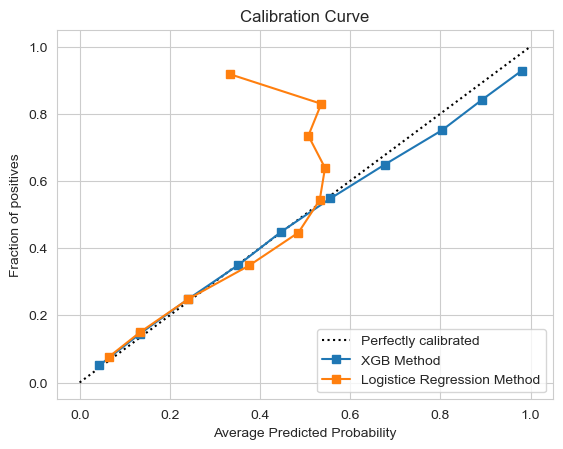

In [169]:
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(frac_positive_gbt, mean_pred_prob_gbt,'s-', label='%s' % 'XGB Method')
plt.plot(frac_positive_lr, mean_pred_prob_lr,'s-', label='%s' % 'Logistice Regression Method')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

We've compared our two models and decided to proceed with the gradient boosted tree. It's time to begin implementing our model and the predicted probabilities of default.

# Acceptance rates

1. Acceptance rate: what percentage of new loans are accepted to keep the number of defaults in a portfolio low Accepted loans which are defaults have an impact similar to false negatives

2. Setting an acceptance rate and calculating the threshold for that rate can be used to set the percentage of new loans you want to accept.

# Difference between Acceptance Rates and Default Recall Rate

1. Focus on Loan Acceptance Rate: The first statement is about setting a threshold for accepting new loans based on risk to control the number of defaults in the portfolio. It is tied to overall loan portfolio management.
2. Focus on Model Performance (Recall): The second concept is purely about the model’s ability to correctly identify default-prone loans, focusing on minimizing false negatives (i.e., loans incorrectly labeled as safe).

In practice, the two are related: if you optimize for high recall, fewer risky loans will be accepted, which may help in keeping defaults low in the portfolio. However, maximizing recall alone might lead to rejecting more loans (including safe ones), whereas the first strategy considers balancing acceptance rates with risk management.

In [170]:
gbt3_pred_df['prob_default'].describe()

count    333968.000000
mean          0.284621
std           0.249123
min           0.004095
25%           0.069389
50%           0.201295
75%           0.451474
max           0.993207
Name: prob_default, dtype: float64

In [171]:
threshold_85 = np.quantile(gbt3_pred_df['prob_default'], 0.85)
threshold_85

0.5940779983997345

In [172]:
gbt3_pred_df.drop('loan_status',axis=1,inplace=True)

In [173]:
gbt3_pred_df['pred_loan_status']=gbt3_pred_df['prob_default'].apply(lambda x: 1 if x>threshold_85 else 0)

In [174]:
gbt3_pred_df['pred_loan_status'].value_counts()

pred_loan_status
0    283872
1     50096
Name: count, dtype: int64

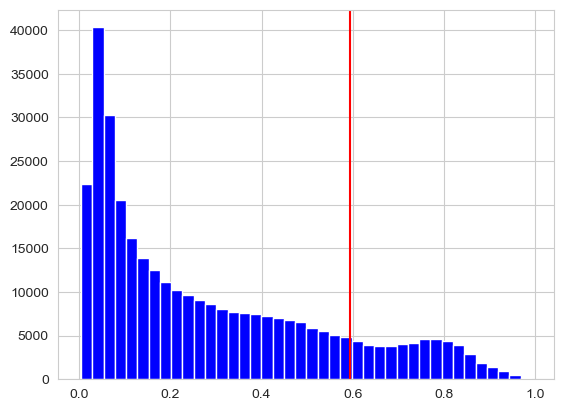

In [175]:
plt.hist(gbt3_pred_df['prob_default'], color = 'blue', bins = 40)
threshold = np.quantile(gbt3_pred_df['prob_default'], 0.85)
plt.axvline(x = threshold, color = 'red')
plt.show()

# Bad Rate
With acceptance rate in mind, you can now analyze the bad rate within the accepted loans. This way you will be able to see the percentage of defaults that have been accepted.

In [176]:
accepted_loans = gbt_pred_f[gbt_pred_f['pred_loan_status']==0]

NameError: name 'gbt_pred_f' is not defined

In [ ]:
gbt_pred_f = pd.concat([gbt3_pred_df.reset_index(drop=True),y_cl_test.reset_index(drop=True)],axis=1)

In [ ]:
bad_rate = (np.sum(accepted_loans['loan_status']))/(accepted_loans['loan_status'].count())

In [ ]:
bad_rate

In [ ]:
gbt_pred_f.head()

# Acceptance rate impact

In [ ]:
mean_loan_amt = np.mean(X_cl2_test['loan_amnt'])
mean_loan_amt

In [ ]:
pd.crosstab(gbt_pred_f['loan_status'],gbt_pred_f['pred_loan_status']).apply(lambda x: x * mean_loan_amt, axis = 0)

In [ ]:
gbt_pred_f.head()

In [ ]:
gbt_pred_f.drop('pred_loan_status',axis=1,inplace=True)

# Strategy Table
We should first create a strategy table containing all the possible acceptance rates we wish to look at along with their associated bad rates and threshold values. This way, we can begin to see each part of your strategy and how it affects your portfolio.

In [ ]:
accept_rate = [1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05]
threshold = []
bad_rate = []

In [ ]:
for rate in accept_rate:
    thresh = np.quantile(gbt_pred_f['prob_default'], rate).round(3)
    threshold.append(np.quantile(gbt_pred_f['prob_default'], rate).round(3))
    gbt_pred_f['pred_loan_status'] = gbt_pred_f['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    accepted_loans = gbt_pred_f[gbt_pred_f['pred_loan_status'] == 0]
    bad_rate.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['loan_status'])).round(3))

In [ ]:
strat_df = pd.DataFrame(zip(accept_rate, threshold, bad_rate),columns = ['Acceptance Rate','Threshold','Bad Rate'])

In [ ]:
strat_df

In [ ]:
strat_df.boxplot()
plt.show()

In [ ]:
accept_rate = [1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05]
threshold = []
bad_rate = []
num_accepted_loans = [] 
for rate in accept_rate:
    thresh = np.quantile(gbt_pred_f['prob_default'], rate).round(3)
    threshold.append(thresh)
    gbt_pred_f['pred_loan_status'] = gbt_pred_f['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    accepted_loans = gbt_pred_f[gbt_pred_f['pred_loan_status'] == 0]
    bad_rate.append(np.sum(accepted_loans['loan_status']) / len(accepted_loans['loan_status']))
    num_accepted_loans.append(len(accepted_loans))

strat_df_2 = pd.DataFrame(
    zip(accept_rate, threshold, bad_rate, num_accepted_loans),
    columns=['Acceptance Rate', 'Threshold', 'Bad Rate', 'Number of Accepted Loans']
)

print(strat_df_2)

# Total expected loss
For this exercise, you will assume that the exposure is the full value of the loan, and the loss given default is 100%. This means that a default on each the loan is a loss of the entire amount.

In [ ]:
display(img)